### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [2]:
!python setup.py build_ext --inplace 

running build_ext
running build_ext


# Import all the relevant files 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help

data_dir = "./Data/"
figure_dir = "./Figures/"

2023-04-26 17:24:32,265	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-04-26 17:24:32,272	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


# Choose the experiment and create the main pipeline

In [5]:
#Choose the experiment
experimentchoice = 'stopsignal'

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

in choose pipeline
in reward pipeline


In [6]:
#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [8]:
environment = {
    'experimentchoice': experimentchoice,
    'inter_trial_interval': None,
    'thalamic_threshold':30.,
    'movement_time':None,#default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300,#default 1000
    
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop - STN
    'stop_signal_present': False,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #Stop- D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1., # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["weight","optogenetic_input"],
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': 2.4, # ampitude of the stop signal over base line
    'opt_signal_onset': 20., # in ms
    'opt_signal_duration': 100.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPeA"],
}

In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)  

(worker pid=32177) in choose pipeline
(worker pid=32177) trial wise mt [253. 251. 251.]
(worker pid=32177) conflict (1.0, 0.0)
(worker pid=32177) change points: [0 1 2 2]
(worker pid=32177) conflict (1.0, 0.0)
(worker pid=32177) <class 'float'>
(worker pid=32177) [1 0 2]
(worker pid=32177) <class 'float'>
(worker pid=32177) [1 2 0]
(worker pid=32177) in choose pipeline
(worker pid=32177) trial wise mt [253. 251. 251.]
(worker pid=32177) conflict (1.0, 0.0)
(worker pid=32177) change points: [0 1 2 2]
(worker pid=32177) conflict (1.0, 0.0)
(worker pid=32177) <class 'float'>
(worker pid=32177) [1 0 2]
(worker pid=32177) <class 'float'>
(worker pid=32177) [1 2 0]
(worker pid=32177) begin GenOptSchedule
(worker pid=32177) <class 'float'>
(worker pid=32177) [0 1 2]
(worker pid=32177) pop GPeA
(worker pid=32177) True
(worker pid=32177) pop GPeA
(worker pid=32177) True
(worker pid=32177) pop GPeA
(worker pid=32177) True
(worker pid=32177) opt_df
(worker pid=32177)    opt_signal_present  ...  o

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(


(worker pid=32177) 0    100.0`
(worker pid=32177) Name: dpmn_CPP_scale, dtype: object
(worker pid=32177) 0    100.0`
(worker pid=32177) Name: dpmn_CPP_scale, dtype: object
(worker pid=32177) agent.opt_popids [6 7]
(worker pid=32177) agent.opt_popids [6 7]
(worker pid=32177) gateFRs [34.         35.33333333]
(worker pid=32177) thresholds_crossed [1]
(worker pid=32177) gateFRs [34.         35.33333333]
(worker pid=32177) thresholds_crossed [1]


(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177)   action
(worker pid=32177) 0   left
(worker pid=32177) 1  right
(worker pid=32177) chosen_action: right
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177)   action
(worker pid=32177) 0   left
(worker pid=32177) 1  right
(worker pid=32177) chosen_action: right
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=3217

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177)

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177)

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=3217

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=3217

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=3217

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)    left  right
(worker pid=32177) 0   0.5  0.500
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32177) 0   0.5  0.375
(worker pid=32

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [62 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [68 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [75 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [81 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [87 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [93 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [99 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worke

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [106 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [112 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [119 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [125 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [131 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [138 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [144 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [151 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [157 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [164 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [170 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [176 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [182 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [189 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [195 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [201 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [208 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [214 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [221 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [227 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [234 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [240 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [246 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [253 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [260 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [266 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [271 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [278 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [284 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [291 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [297 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [304 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [310 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [317 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [323 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [330 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [337 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [343 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [350 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [357 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [363 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [370 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [376 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [383 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [389 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [396 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [403 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [409 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [416 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [423 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [429 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [436 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [442 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [449 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [455 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [462 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [468 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [475 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [481 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [488 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [493 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(work

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 
(worker pid=32177) [499 rows x 2 columns]
(worker pid=32177) trial_num 0
(worker pid=32177) q_val_chosen [0.5]
(worker pid=32177) da_inc [-0.5]
(worker pid=32177) Q_df updated
(worker pid=32177)     left  right
(worker pid=32177) 0    0.5  0.500
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) ..   ...    ...
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375
(worker pid=32177) 0    0.5  0.375

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [506 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [512 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [519 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [525 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [532 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [538 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [544 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [550 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [556 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [563 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [568 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [575 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [581 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [587 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [593 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [599 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [605 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [611 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [617 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [623 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [629 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [635 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [642 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [648 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [654 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [660 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [667 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [673 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [679 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [685 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [692 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [698 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [704 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [710 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [716 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [723 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [729 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [735 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [741 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [748 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [754 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [760 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [767 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [773 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [779 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [786 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [792 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [799 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [805 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [811 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [818 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [824 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [830 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [837 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [843 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [849 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [856 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [862 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [869 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [875 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [882 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [888 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [895 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [901 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [908 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [914 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [920 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [926 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [933 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [939 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [946 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [952 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [958 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [965 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [971 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [977 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [984 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)   action
(worker pid=32177) 0   left
(worker pid=32177) 1  right
(worker pid=32177) chosen_action: right
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [990 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000


(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [997 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pi

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1004 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1010 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1016 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1022 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1029 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1036 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1042 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1049 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1056 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1062 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1069 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1075 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1082 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1088 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1095 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1102 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1108 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1115 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1122 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1128 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1135 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1141 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1148 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1155 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1161 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1168 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1174 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1181 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1188 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1194 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1201 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1208 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1214 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1221 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1228 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1234 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1241 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1247 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1254 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1260 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1267 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1273 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1280 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1287 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1293 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1300 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1306 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1313 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1320 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1326 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1332 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1339 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1346 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1352 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1359 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1365 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1372 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1379 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1385 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1392 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1399 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1405 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1412 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1418 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1425 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1431 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.37500

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1438 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1445 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1451 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1458 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1465 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1471 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1478 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1484 rows x 2 columns]
(worker pid=32177) trial_num 1
(worker pid=32177) q_val_chosen [0.375]
(worker pid=32177) da_inc [0.8117558]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.375000
(worker p

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1491 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1497 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1504 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1510 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1516 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1522 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1529 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1535 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1541 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1547 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1554 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1560 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1566 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1572 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1578 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1584 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1591 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1597 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1603 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1609 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1615 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1622 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1628 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1634 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1641 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1647 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1654 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1660 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1666 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1673 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1679 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1686 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1692 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1698 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1705 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1711 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1718 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1724 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1730 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1737 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1743 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1750 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1756 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1763 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1769 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1776 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1782 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1789 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1795 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1801 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1808 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1814 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1821 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1827 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1834 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1840 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1846 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1853 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1859 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1865 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1872 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1878 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1885 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1891 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1898 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1905 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1911 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1918 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1924 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1931 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1937 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1944 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1951 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1957 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1963 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1970 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1976 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1983 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1990 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [1996 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2003 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2009 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2016 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2022 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2029 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2035 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2042 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2049 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2056 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2062 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2069 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2075 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2082 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2089 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2095 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2102 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2108 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2115 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2121 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2128 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2134 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2141 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2148 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2154 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2161 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2167 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2174 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2180 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2187 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2193 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2200 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2207 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2213 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2220 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2226 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2233 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2239 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2246 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2253 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2259 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2266 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2272 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2279 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2285 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2292 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2299 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2305 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2312 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2318 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2325 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2331 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2338 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2344 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2351 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2357 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2364 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2370 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.append(new_data)
(worker pid=32177) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=32177)   Q_df = Q_df.a

(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.433454
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) ..   ...       ...
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 
(worker pid=32177) [2377 rows x 2 columns]
(worker pid=32177) trial_num 2
(worker pid=32177) q_val_chosen [0.57793895]
(worker pid=32177) da_inc [-0.57793895]
(worker pid=32177) Q_df updated
(worker pid=32177)     left     right
(worker pid=32177) 0    0.5  0.500000
(worker pid=32177) 0    0.5  0.375000
(worker pid=32177) 0    0.5  0.577939
(worker pid=32177) 0    0.5  0.43

In [10]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitu

In [11]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

/Users/cristina/Desktop/test/CBGTPy/plotting_helper_functions.py:219: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [12]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]


decision stimulusstarttime decisiontime decisionduration  \
0    right                 0          831              831   
1    right              1586         1821              235   
2    right              2574         2709              135   

  decisiondurationplusdelay rewardtime correctdecision  reward  
0                      1085       1085            left     0.0  
1                       487       2073           right     1.0  
2                       387       2961            left     0.0

In [13]:
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    254
1    252
2    252
dtype: object

In [16]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

GPi_left  GPi_right  STNE_left  STNE_right  GPeP_left  GPeP_right  \
0     81.111111  76.000000  22.466667   23.111111  48.700000   46.666667   
1     81.333333  76.000000  22.577778   23.333333  48.800000   46.733333   
2     81.111111  76.000000  22.533333   23.355556  48.733333   46.800000   
3     81.555556  76.222222  22.444444   23.355556  48.700000   46.833333   
4     81.111111  77.111111  22.333333   23.111111  48.766667   46.566667   
...         ...        ...        ...         ...        ...         ...   
3458  75.111111  79.777778  24.377778   24.000000  46.633333   44.933333   
3459  76.888889  78.444444  24.222222   24.044444  46.533333   44.200000   
3460  76.222222  80.222222  24.200000   24.044444  46.500000   44.600000   
3461  75.333333  81.555556  24.244444   23.977778  46.900000   44.233333   
3462  76.222222  81.777778  24.133333   24.177778  47.000000   44.366667   

      GPeA_left  GPeA_right  D1STR_left  D1STR_right  D2STR_left  D2STR_right  \
0     10.200000   15.200000    1.111111     2.666667    1.333333     1.777778   
1     10.333333   15.000000    1.333333     2.666667    1.333333     1.777778   
2     10.266667   15.200000    1.333333     2.666667    1.333333     1.777778   
3     10.333333   15.066667    1.555556     2.666667    1.333333     1.777778   
4     10.133333   15.400000    1.555556     2.666667    1.333333     1.777778   
...         ...         ...         ...          ...         ...          ...   
3458  10.133333   14.400000    3.333333     3.333333    4.666667     5.777778   
3459  10.266667   14.066667    3.333333     3.111111    4.888889     5.777778   
3460  10.333333   14.133333    3.333333     3.111111    4.666667     5.777778   
3461  10.733333   14.200000    3.333333     2.666667    4.444444     5.777778   
3462  10.733333   13.800000    3.111111     2.666667    4.888889     5.333333   

       Cx_left  Cx_right    Th_left   Th_right  FSI_common  CxI_common  \
0     0.000000  0.000000   6.000000   7.777778    7.777778    0.896057   
1     0.000000  0.000000   6.222222   7.777778    7.777778    0.896057   
2     0.000000  0.000000   6.222222   7.777778    8.000000    0.896057   
3     0.000000  0.000000   6.222222   7.777778    7.777778    0.716846   
4     0.000000  0.000000   6.444444   7.777778    8.000000    0.716846   
...        ...       ...        ...        ...         ...         ...   
3458  2.941176  4.738562  11.777778  12.000000    9.777778    3.046595   
3459  3.022876  4.901961  11.777778  11.111111   10.000000    2.956989   
3460  3.022876  4.820261  11.555556  12.000000   10.000000    2.956989   
3461  3.104575  5.147059  11.777778  11.555556    9.555556    2.956989   
3462  3.186275  5.228758  11.555556  11.777778    9.777778    3.046595   

      Time (ms)  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
3458       3458  
3459       3459  
3460       3460  
3461       3461  
3462       3462  

[3463 rows x 19 columns]

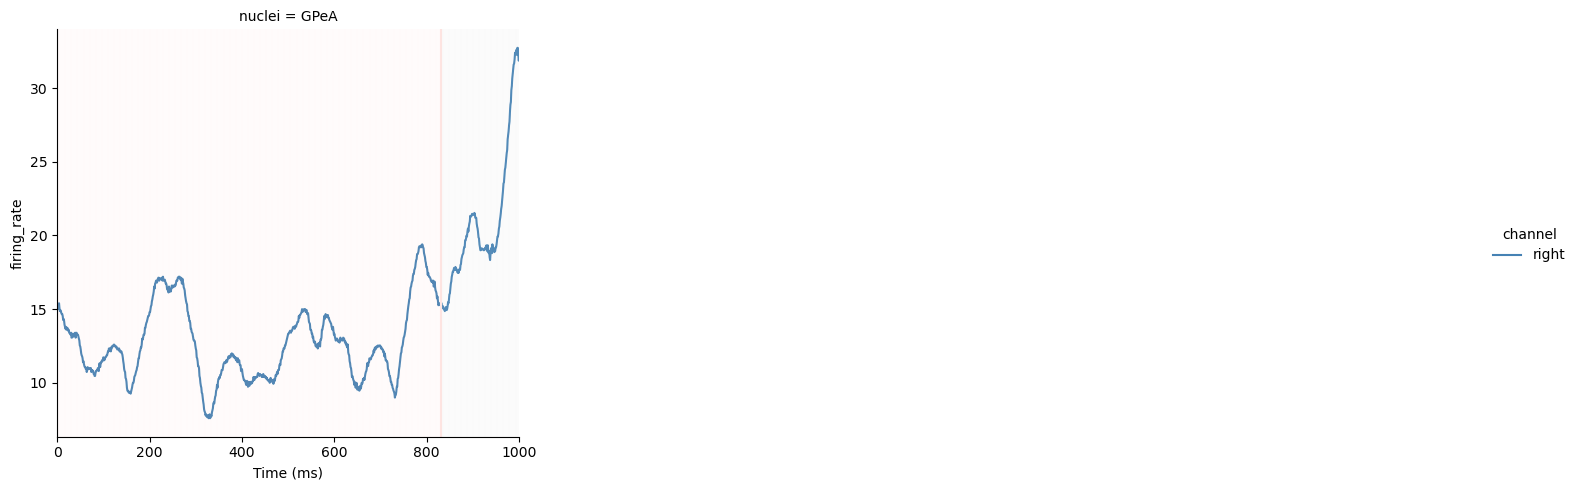

In [18]:
FR_fig_handles = plt_func.plot_fr_flex(firing_rates[0],datatables[0], ['right'], ['GPeA'], (0, 1000)) 

In [ ]:
import importlib

importlib.reload(plt_func)

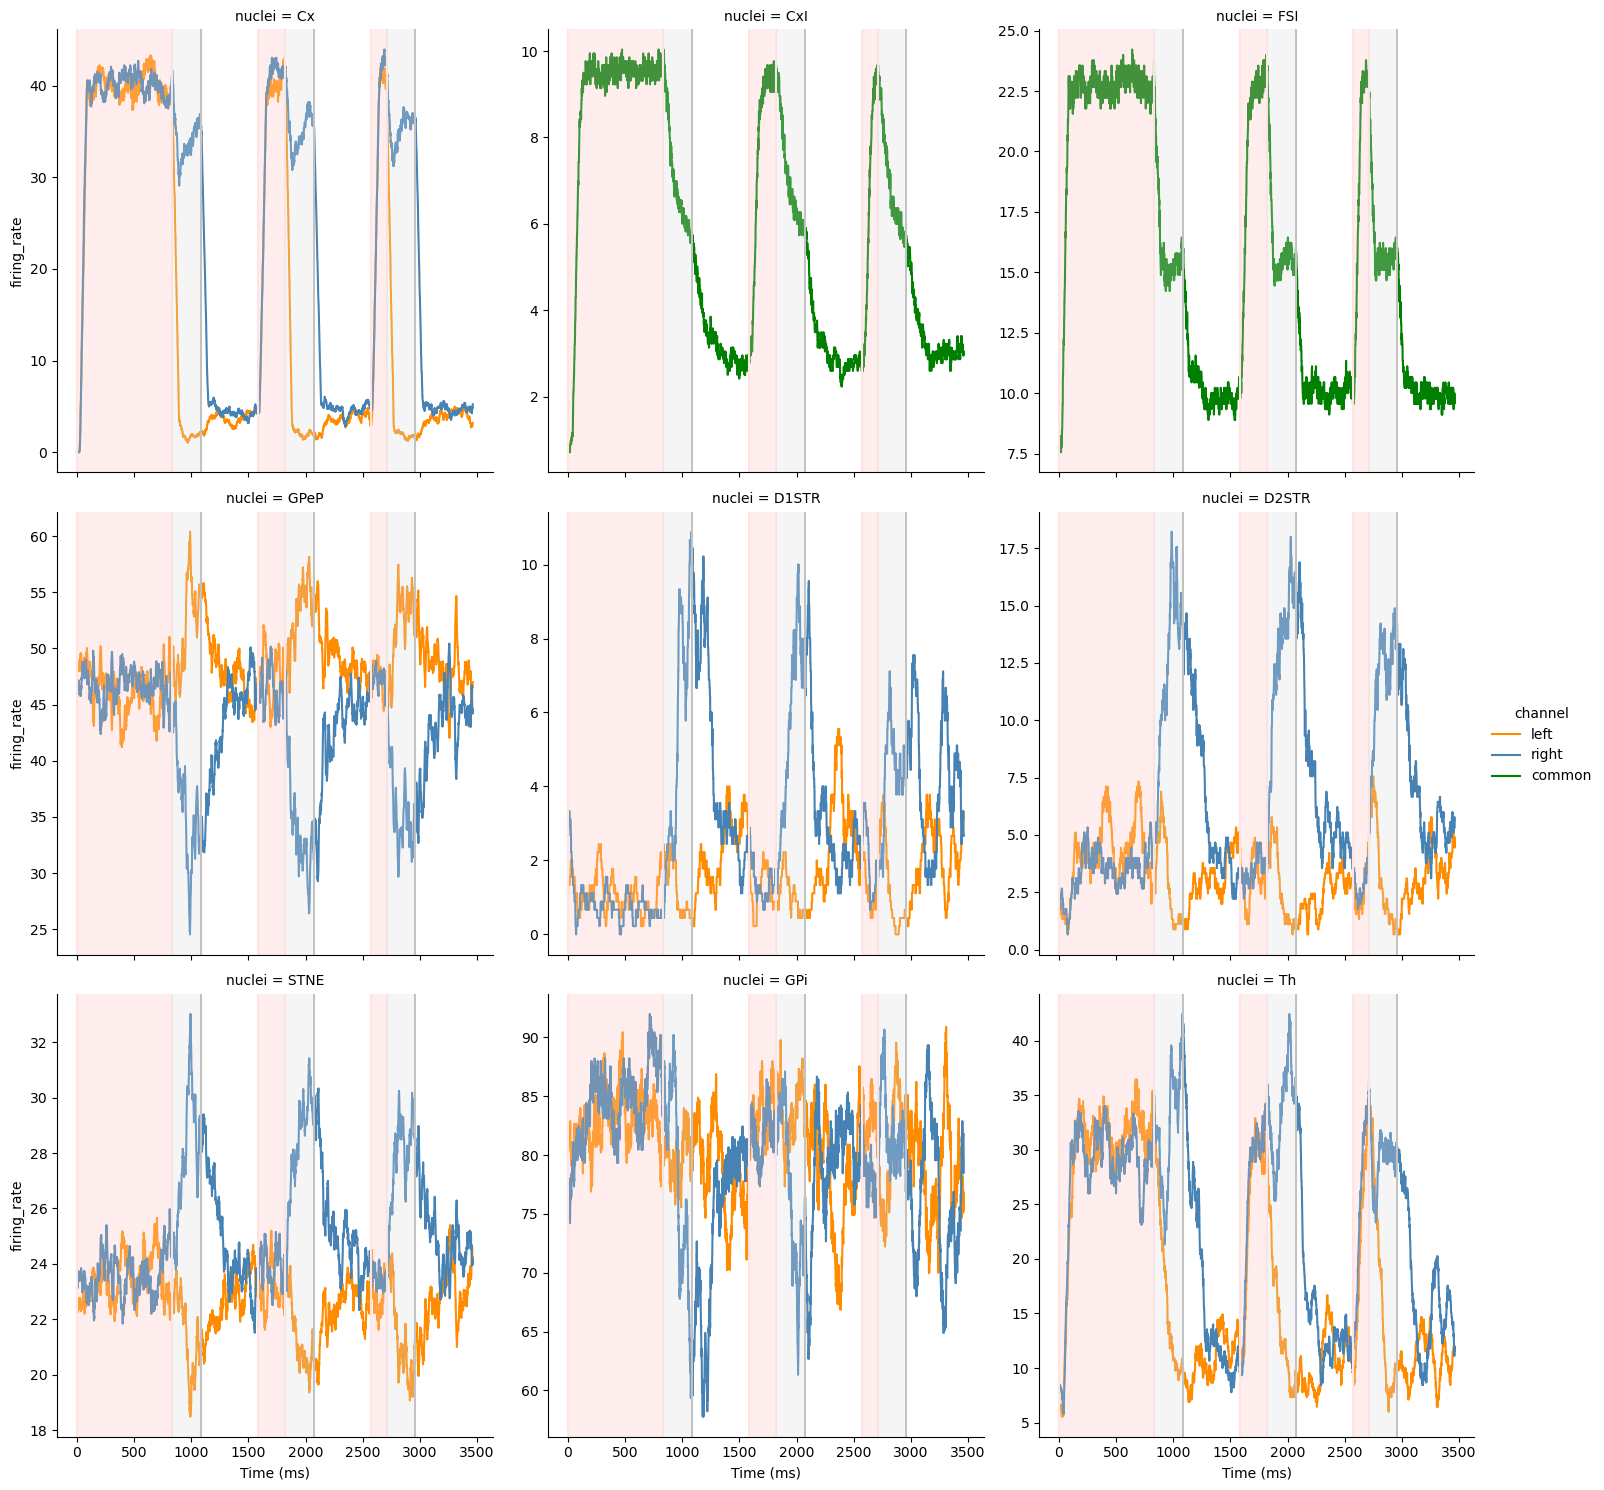

In [19]:
FR_fig_handles = plt_func.plot_fr(firing_rates, datatables)

In [ ]:
results[0]['datatables'].iloc[1].stimulusstarttime

In [ ]:
from matplotlib.lines import Line2D

f, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
plt_help.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax1[0])
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax1[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax1[0].set_xlabel('Time (ms)')
    ax1[0].title.set_text('D2STR')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c ='b', ax=ax1[1])
    #ax1[1].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[1].legend(['D1STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[1].set_xlabel('Time (ms)')
    ax1[1].title.set_text('D1STR')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    #ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[0].set_xlabel('Time (ms)')
    ax2[0].title.set_text('GPeP')
    #if results[0]['opt_signal_present'] == True:
        #ax2[0].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='darkmagenta', linewidth = 6)
       

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    #ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
       #ax1[1].hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[1].set_xlabel('Time (ms)')
    ax2[1].title.set_text('GPeA')
    if results[0]['opt_signal_present'] == True:
        ax2[1].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='mediumseagreen', linewidth = 6)
       
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    #ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    #ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    ax3[0].set_xlabel('Time (ms)')
    ax3[0].title.set_text('STNE')
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[1].vlines(j, 3, 137, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1], label='GPi')
    #ax3[1].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax3[1].set_xlabel('Time (ms)')
    ax3[1].title.set_text('GPi')
    
ax1[1].set_ylim(0, 120)
ax2[0].set_ylim(0, 120)
ax2[1].set_ylim(0, 120)
ax1[0].set_ylim(0, 120)
ax3[0].set_ylim(0, 120)
ax3[1].set_ylim(0, 120)

ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax2[0].get_legend().remove()
ax2[1].get_legend().remove()
ax3[0].get_legend().remove()
ax3[1].get_legend().remove()

#blue_patch = mpatches.Patch(color='blue', linestyle='dotted', linewidth=0.5, label='go')
#red_patch = mpatches.Patch(color='red', label='stop')
#fig.legend(handles=[blue_patch, red_patch])

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go'),
                   Line2D([0], [0], color='red', lw=3, linestyle='dotted', label='stop')]
ax1[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')

In [ ]:
import pylab as pl
from matplotlib.lines import Line2D

plt_help.rename_columns(results[0])
popfreqs = cbgt.collateVariable(results,'popfreqs')
datatables = cbgt.collateVariable(results,'datatables')

opt_input = np.array(results[0]['agent'].opt_inp)

f, (ax) = pl.subplots(1, 2, figsize=(16, 6), sharex=True)

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[0].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':') 
ax[0].plot(opt_input[:,0],label='GPeA-baseline', color = 'tab:green', linewidth = 2.5)
ax[0].legend()
ax[0].set_xlabel('Time (ms)')
ax[0].title.set_text('Input stimulus over baseline')


    #ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[1].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'orange',linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
ax[1].plot(results[0]['popfreqs']['GPeA_right'],label="D1STR-activity",color='b')
ax[1].legend()
ax[1].set_xlabel('Time (ms)')
ax[1].title.set_text('GPeA activity over 3 trials')
    
ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[1].set_ylim(0, 40)
ax[0].set_ylim(0, 40)

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go right'),
                   Line2D([0], [0], color='orange', lw=3, linestyle='dotted', label='go left')]
ax[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')


pl.show()